In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

## NOTE: Do not download the full zip from the link! We provide a special version of this file that has some extra feature engineering for you to do. You won't be able to follow along with the original file!

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Starter Code

#### Note: We also provide feature information on the data as a .csv file for easy lookup throughout the notebook:

In [284]:
import pandas as pd

In [285]:
data_info = pd.read_csv('DATA/lending_club_info.csv',index_col='LoanStatNew')

In [286]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [287]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [288]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [290]:
df = pd.read_csv('DATA/lending_club_loan_two.csv')

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [292]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


<Axes: xlabel='loan_status', ylabel='count'>

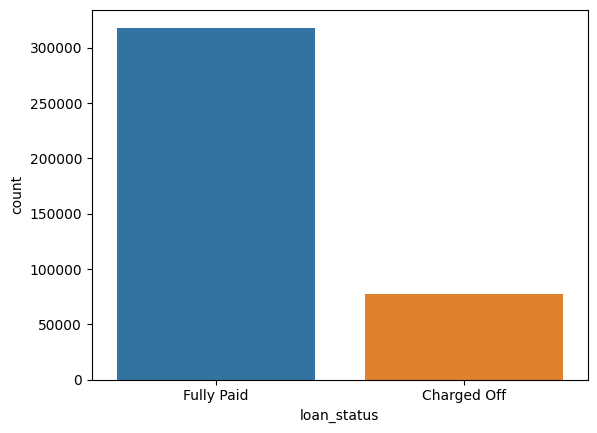

In [293]:
sns.countplot(x='loan_status',data=df,hue='loan_status')

<Axes: xlabel='loan_amnt', ylabel='Count'>

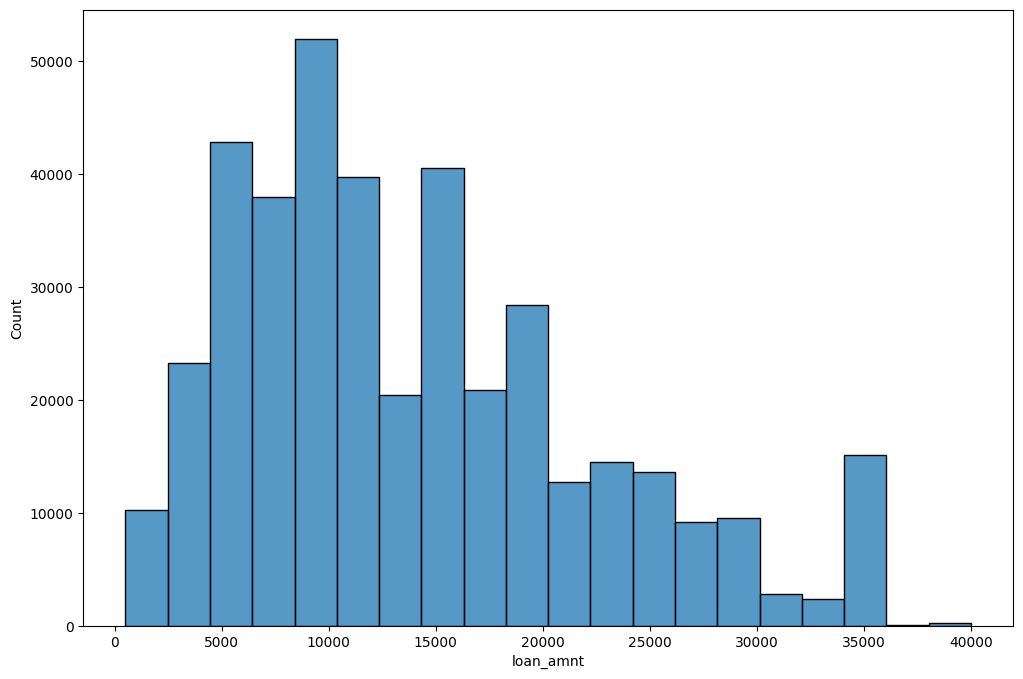

In [294]:
plt.figure(figsize=(12,8))

sns.histplot(x='loan_amnt', data=df, bins=20)

In [295]:
# CODE HERE
df.corr(numeric_only=True)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<Axes: >

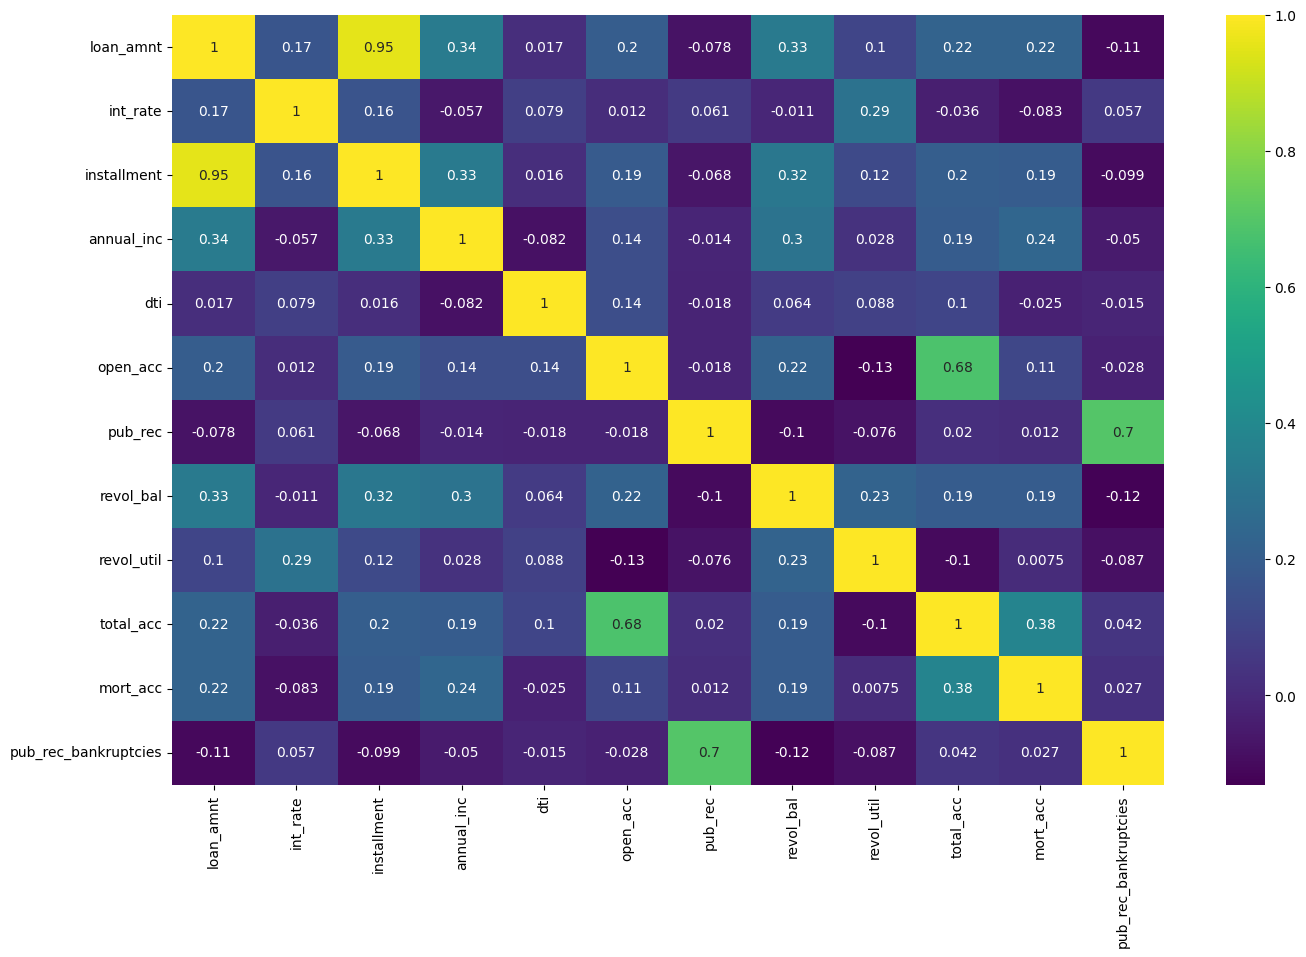

In [296]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='viridis')

In [297]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [298]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<Axes: xlabel='installment', ylabel='loan_amnt'>

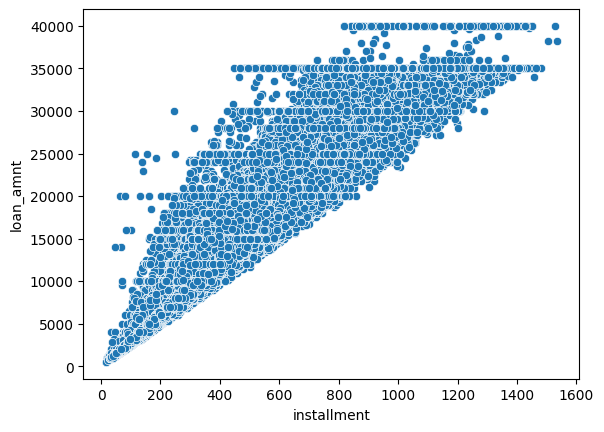

In [299]:
sns.scatterplot(x='installment', y='loan_amnt',data=df,)

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

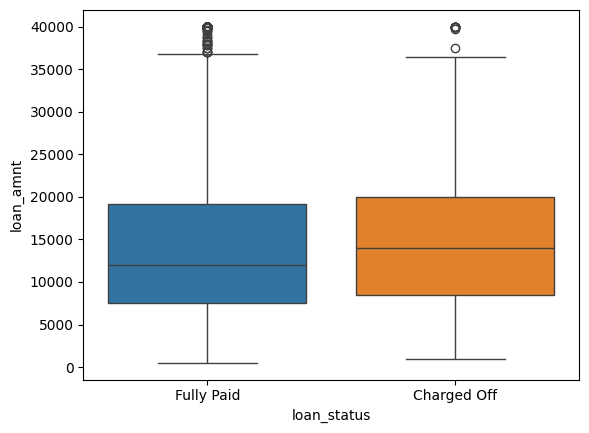

In [300]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df,hue='loan_status')

In [301]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [302]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [303]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<Axes: xlabel='grade', ylabel='count'>

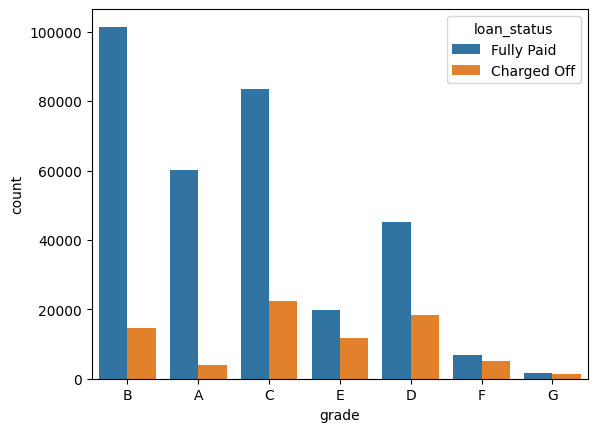

In [304]:
sns.countplot(x='grade',data=df, hue='loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

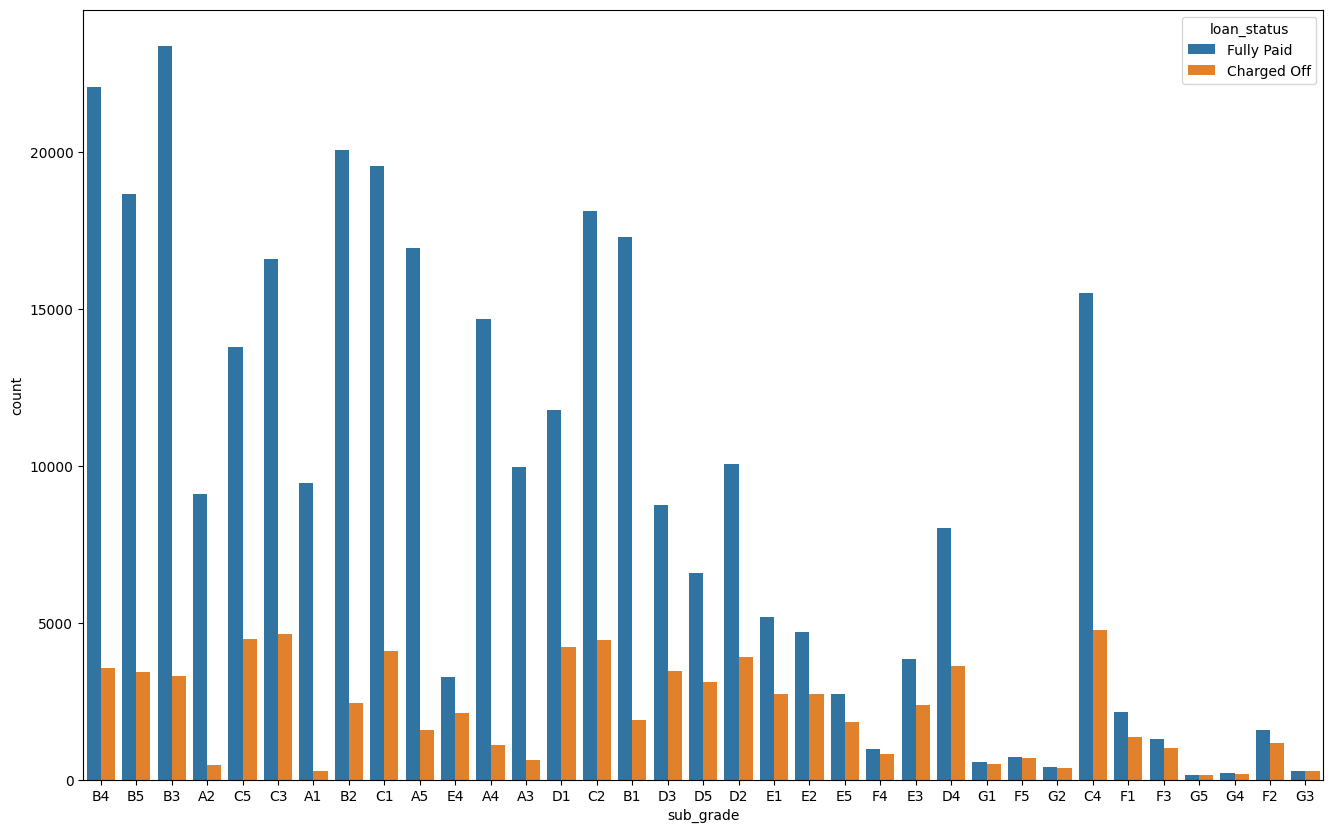

In [305]:
plt.figure(figsize=(16,10))
sns.countplot(x='sub_grade', data=df, hue='loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

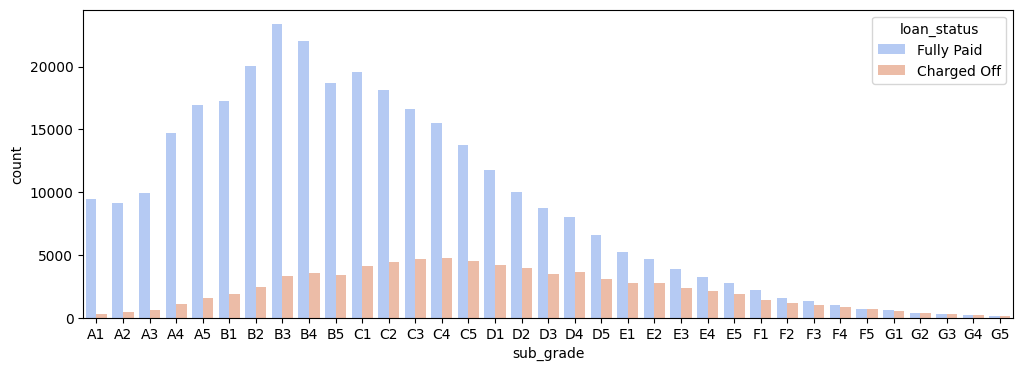

In [306]:
plt.figure(figsize=(12, 4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade', data=df,order = subgrade_order,hue='loan_status',palette='coolwarm' )

<Axes: xlabel='sub_grade', ylabel='count'>

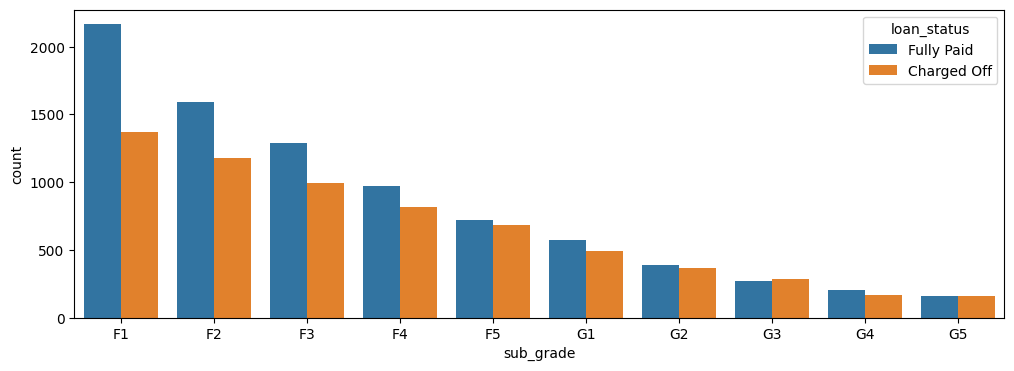

In [307]:
f_and_g = df[(df['grade'] == 'G') | (df['grade'] == 'F')]

plt.figure(figsize=(12, 4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade', data=f_and_g,order = subgrade_order,hue='loan_status')

In [308]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [309]:
df[['loan_amnt','loan_status','loan_repaid']]

,loan_amnt,loan_status,loan_repaid
0,10000.0,Fully Paid,1
1,8000.0,Fully Paid,1
2,15600.0,Fully Paid,1
3,7200.0,Fully Paid,1
4,24375.0,Charged Off,0
...,...,...,...
396025,10000.0,Fully Paid,1
396026,21000.0,Fully Paid,1
396027,5000.0,Fully Paid,1
396028,21000.0,Fully Paid,1


<Axes: >

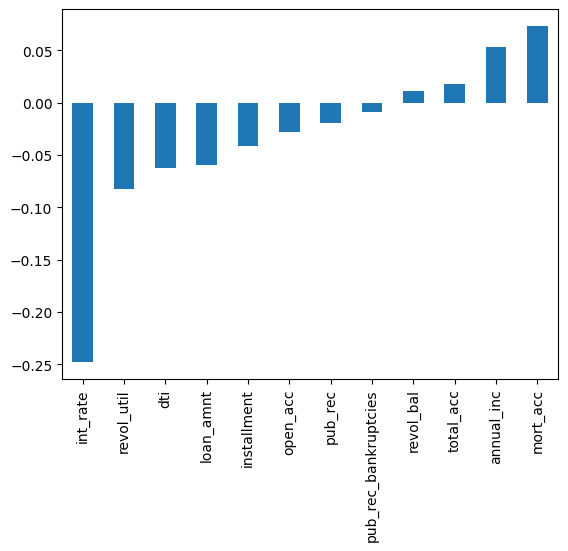

In [310]:
df.corr(numeric_only=True)['loan_repaid'][:-1].sort_values().plot(kind='bar')

In [311]:
df.head()


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0


In [312]:
len(df)

396030

In [313]:
df.isnull().sum()*100/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [314]:
feat_info('emp_title')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [315]:
df['emp_title'].nunique()

173105

In [316]:
df['emp_title'].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

In [317]:
df=df.drop('emp_title',axis=1)

In [318]:
df.head()


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0


In [319]:
df.columns.sort_values

<bound method Index.sort_values of Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')>

In [320]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [321]:
emp_order = ['< 1 year',
             '1 year',
             '2 years',
             '3 years',
             '4 years',
             '5 years',
             '6 years',
             '7 years',
             '8 years',
             '9 years',
             '10+ years']

<Axes: xlabel='emp_length', ylabel='count'>

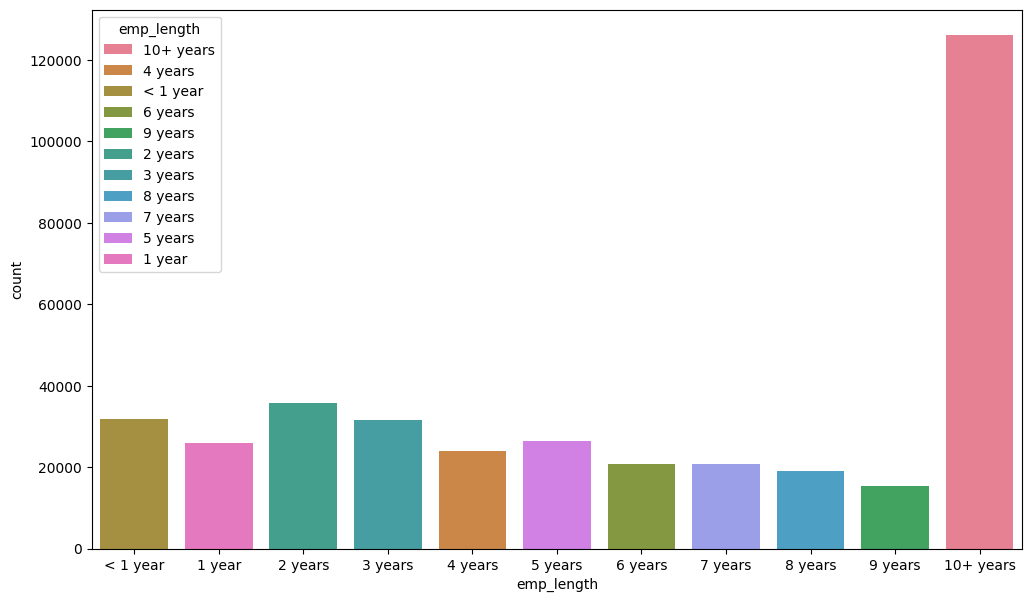

In [322]:
plt.figure(figsize=(12,7))
sns.countplot(x='emp_length',data=df, order=emp_order, hue='emp_length')

<Axes: xlabel='emp_length', ylabel='count'>

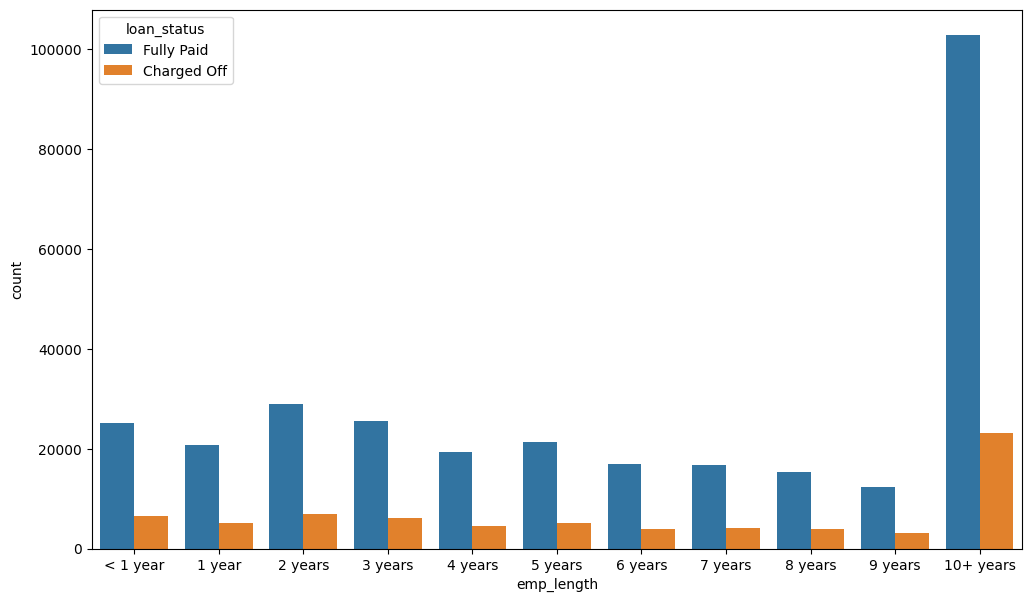

In [323]:
plt.figure(figsize=(12, 7))
sns.countplot(x='emp_length', data=df, order=emp_order, hue='loan_status')

In [324]:
emp_co=df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [325]:
emp_co.head()

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
Name: loan_status, dtype: int64

In [326]:
emp_fp = df[df['loan_status'] =='Fully Paid'].groupby('emp_length').count()['loan_status']

In [327]:
emp_fp

emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Name: loan_status, dtype: int64

In [328]:
emp_len=emp_co/(emp_fp+emp_co)

In [329]:
emp_len

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_status, dtype: float64

<Axes: xlabel='emp_length'>

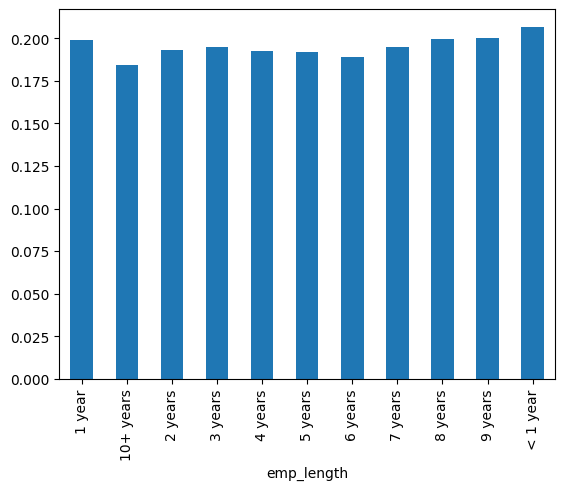

In [330]:
emp_len.plot(kind='bar')

In [331]:
df=df.drop('emp_length',axis=1)

In [332]:
df.columns.sort

<bound method Index.sort of Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')>

In [333]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [334]:
df['title']

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object

In [335]:
df['purpose']

0                   vacation
1         debt_consolidation
2                credit_card
3                credit_card
4                credit_card
                 ...        
396025    debt_consolidation
396026    debt_consolidation
396027    debt_consolidation
396028    debt_consolidation
396029    debt_consolidation
Name: purpose, Length: 396030, dtype: object

In [336]:
df.drop('title',axis=1,inplace=True)

In [337]:
df['mort_acc'].head(10)

0    0.0
1    3.0
2    0.0
3    0.0
4    1.0
5    4.0
6    3.0
7    0.0
8    3.0
9    1.0
Name: mort_acc, dtype: float64

In [338]:
feat_info('mort_acc')

Number of mortgage accounts.


In [339]:
df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

In [340]:
df.corr(numeric_only=True)['mort_acc'].sort_values(ascending=False)

mort_acc                1.000000
total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
loan_repaid             0.073111
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
Name: mort_acc, dtype: float64

In [341]:
df_num = df.select_dtypes(include=['int64', 'float64', 'int32', 'float32'])

In [342]:
df_num.head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,loan_repaid
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,1
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,1
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,1
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,1
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,0


In [343]:
df_num.drop(['revol_util', 'pub_rec_bankruptcies'],axis=1,inplace=True)

In [344]:
y=df_num['mort_acc']

In [345]:
y.head()

0    0.0
1    3.0
2    0.0
3    0.0
4    1.0
Name: mort_acc, dtype: float64

In [346]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split

In [347]:
X_train=df_num[df_num['mort_acc'].notna()].drop('mort_acc',axis=1)
X_test = df_num[df_num['mort_acc'].isna()].drop('mort_acc',axis=1)

In [348]:
y.head()

0    0.0
1    3.0
2    0.0
3    0.0
4    1.0
Name: mort_acc, dtype: float64

In [349]:
X_train.isnull().sum()

loan_amnt      0
int_rate       0
installment    0
annual_inc     0
dti            0
open_acc       0
pub_rec        0
revol_bal      0
total_acc      0
loan_repaid    0
dtype: int64

In [350]:
y_train = df[df['mort_acc'].notna()]['mort_acc']
y_test = df[df['mort_acc'].isna()]['mort_acc']

In [351]:

X_test.isnull().sum()

loan_amnt      0
int_rate       0
installment    0
annual_inc     0
dti            0
open_acc       0
pub_rec        0
revol_bal      0
total_acc      0
loan_repaid    0
dtype: int64

In [352]:
df[df['mort_acc'].isna()]['mort_acc']

22       NaN
25       NaN
32       NaN
41       NaN
62       NaN
          ..
395991   NaN
395995   NaN
396016   NaN
396021   NaN
396029   NaN
Name: mort_acc, Length: 37795, dtype: float64

In [353]:
len(y_train)

358235

In [354]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [355]:
# Predict using the test set
predictions = lm.predict(X_test)
print("Predicted values:", predictions)

Predicted values: [0.37893232 0.10640227 1.59089302 ... 1.68963678 2.95129553 1.71516959]


In [356]:
# Step 1: Identify indices where mort_acc is NaN
null_indices = df[df['mort_acc'].isna()].index

# Step 2: Assign predictions back to those indices
df.loc[null_indices, 'mort_acc'] = predictions

# Verify the updated DataFrame
print(df.loc[null_indices, 'mort_acc'])

22        0.378932
25        0.106402
32        1.590893
41        1.933570
62        0.888255
            ...   
395991    1.400861
395995    1.627876
396016    1.689637
396021    2.951296
396029    1.715170
Name: mort_acc, Length: 37795, dtype: float64


In [357]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [358]:
df.dropna(inplace=True)

In [359]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [360]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [361]:
df['term'].value_counts()

term
36 months    301247
60 months     93972
Name: count, dtype: int64

In [362]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [363]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

In [364]:
df.drop('grade',axis=1,inplace=True)

In [365]:
subg=pd.get_dummies(df['sub_grade'],drop_first=True)

In [366]:
df=pd.concat([df.drop('sub_grade',axis=1),subg],axis=1)

In [367]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,...,False,False,False,False,False,False,False,False,False,False
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,...,False,False,False,False,False,False,False,False,False,False
2,15600.0,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,...,False,False,False,False,False,False,False,False,False,False
3,7200.0,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,...,False,False,False,False,False,False,False,False,False,False
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,...,False,False,False,False,False,False,False,False,False,False


In [368]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [369]:
dummies = pd.get_dummies(df[['verification_status', 'application_type',
                         'initial_list_status', 'purpose']], drop_first=True)
df = df.drop(['verification_status', 'application_type',
             'initial_list_status', 'purpose'], axis=1)
df = pd.concat([df, dummies],axis=1)

In [370]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

In [371]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

In [372]:
df.loc[(df['home_ownership'] == 'NONE') | (
    df['home_ownership'] == 'ANY'), 'home_ownership'] = 'OTHER'

In [373]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: count, dtype: int64

In [374]:
dummies=pd.get_dummies(df['home_ownership'],drop_first=True)

In [375]:
df=df.drop('home_ownership',axis=1)

In [376]:
df=pd.concat([df,dummies],axis=1)

In [377]:
df['address'].head()

0       0174 Michelle Gateway\r\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3              823 Reid Ford\r\nDelacruzside, MA 00813
4               679 Luna Roads\r\nGreggshire, VA 11650
Name: address, dtype: object

In [378]:
int(df['address'][2].split()[-1:][0])

5113

In [379]:
df['zip_code'] = df['address'].apply(lambda zip: int(zip.split()[-1:][0]))

In [380]:
df['zip_code']

0         22690
1          5113
2          5113
3           813
4         11650
          ...  
396025    30723
396026     5113
396027    70466
396028    29597
396029    48052
Name: zip_code, Length: 395219, dtype: int64

In [381]:
dummies = pd.get_dummies(df['zip_code'], drop_first=True)
df = df.drop(['zip_code', 'address'], axis=1)
df = pd.concat([df, dummies],axis=1)

In [382]:
df.columns

Index([                          'loan_amnt',
                                      'term',
                                  'int_rate',
                               'installment',
                                'annual_inc',
                                   'issue_d',
                               'loan_status',
                                       'dti',
                          'earliest_cr_line',
                                  'open_acc',
                                   'pub_rec',
                                 'revol_bal',
                                'revol_util',
                                 'total_acc',
                                  'mort_acc',
                      'pub_rec_bankruptcies',
                               'loan_repaid',
                                        'A2',
                                        'A3',
                                        'A4',
                                        'A5',
                                  

In [383]:
df = df.drop('issue_d', axis=1)

In [384]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(
    lambda date: int(date[-4:]))
df = df.drop('earliest_cr_line', axis=1)

In [385]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [386]:
df = df.drop('loan_status', axis=1)

In [387]:
X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values

In [388]:
X

array([[10000.0, 36, 11.44, ..., False, False, 1990],
       [8000.0, 36, 11.99, ..., False, False, 2004],
       [15600.0, 36, 10.49, ..., False, False, 2007],
       ...,
       [5000.0, 36, 9.99, ..., False, False, 1997],
       [21000.0, 60, 15.31, ..., False, False, 1990],
       [2000.0, 36, 13.61, ..., False, False, 1998]], dtype=object)

In [389]:
print(len(df))

395219


In [390]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=101)

In [391]:
from sklearn.preprocessing import MinMaxScaler

In [392]:
scaler=MinMaxScaler()

In [393]:
X_train = scaler.fit_transform(X_train)

In [394]:
X_test = scaler.transform(X_test)

In [395]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.constraints import max_norm

In [396]:
model = Sequential()

In [397]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw


# input layer
model.add(Dense(80,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [398]:
model.fit(x=X_train,
          y=y_train,
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test),
          )

Epoch 1/25
1236/1236 [==============================] - 5s 3ms/step - loss: 0.3009 - val_loss: 0.2648
Epoch 2/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2660 - val_loss: 0.2632
Epoch 3/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2628 - val_loss: 0.2625
Epoch 4/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2617 - val_loss: 0.2626
Epoch 5/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2614 - val_loss: 0.2621
Epoch 6/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2605 - val_loss: 0.2616
Epoch 7/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2600 - val_loss: 0.2616
Epoch 8/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2595 - val_loss: 0.2614
Epoch 9/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2592 - val_loss: 0.2614
Epoch 10/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.259

In [399]:
from tensorflow.keras.models import load_model

In [400]:
model.save('full_data_project_model.h5')

In [401]:
losses = pd.DataFrame(model.history.history)

<Axes: >

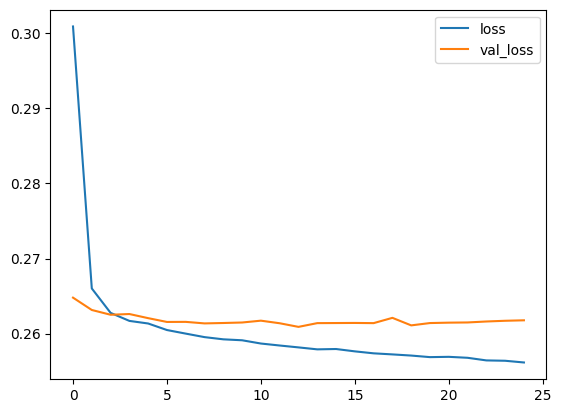

In [402]:
losses.plot()

In [403]:
from sklearn.metrics import classification_report, confusion_matrix

In [404]:
predictions = (model.predict(X_test) > 0.5).astype("int64")

2471/2471 [==============================] - 3s 1ms/step


In [405]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [406]:
confusion_matrix(y_test, predictions)

array([[ 6859,  8799],
       [  111, 63275]], dtype=int64)

In [407]:
df[df['loan_repaid']==0].head(500)[['loan_amnt','loan_repaid']]

,loan_amnt,loan_repaid
4,24375.0,0
25,6000.0,0
26,8400.0,0
36,3250.0,0
41,28000.0,0
...,...,...
2636,14250.0,0
2640,12000.0,0
2642,13000.0,0
2654,8000.0,0


In [408]:
import random
df.reset_index(drop=True, inplace=True)
#random.seed(101)
random_ind = random.randint(0, len(df))
print(random_ind)
n = 2642
new_customer = df.drop('loan_repaid', axis=1).iloc[n]
new_customer

229533


loan_amnt            6000.0
term                     36
int_rate               9.67
installment          192.68
annual_inc          35000.0
                     ...   
48052                 False
70466                 False
86630                 False
93700                 False
earliest_cr_year       2002
Name: 2642, Length: 78, dtype: object

In [409]:
reshaped_data = new_customer.values.astype(np.float64).reshape(1, 78)

In [410]:
predictions2 = (model.predict(reshaped_data) > 0.5).astype("int64")
print(predictions2)
print(predictions)

1/1 [==============================] - 0s 18ms/step
[[1]]
[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [0]]


In [411]:
df.iloc[n][['loan_amnt', 'loan_repaid']]

loan_amnt      6000.0
loan_repaid         1
Name: 2642, dtype: object

In [412]:
print(new_customer.isnull().sum())
print(new_customer.dtypes)

0
object


In [415]:
df.iloc[950][['loan_amnt', 'loan_repaid']]

loan_amnt      35000.0
loan_repaid          1
Name: 950, dtype: object

In [419]:

df=df.drop('index',axis=1)
df[900:950]

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,5113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
900,20000.0,36,14.09,684.43,70000.0,23.52,13.0,0.0,24099.0,43.0,...,False,False,False,False,False,False,False,False,False,2002
901,9000.0,36,11.44,296.53,180000.0,6.90,5.0,3.0,3722.0,64.2,...,False,False,False,False,False,False,False,True,False,2004
902,35000.0,36,14.49,1204.57,96450.0,10.17,16.0,0.0,29878.0,64.4,...,False,False,False,False,False,True,False,False,False,1998
903,20000.0,36,6.03,608.72,100000.0,20.16,13.0,0.0,23506.0,40.9,...,False,False,False,False,False,True,False,False,False,2001
904,5000.0,36,13.72,170.21,30000.0,7.24,4.0,0.0,6265.0,75.5,...,False,False,False,True,False,False,False,False,False,2007
905,6000.0,36,6.49,183.87,29000.0,2.07,6.0,0.0,1025.0,11.1,...,False,False,True,False,False,False,False,False,False,2007
906,6000.0,36,13.35,203.18,42000.0,19.40,12.0,1.0,3634.0,17.6,...,False,False,True,False,False,False,False,False,False,2004
907,11000.0,36,14.49,378.58,50000.0,8.27,9.0,0.0,11835.0,51.9,...,False,False,False,True,False,False,False,False,False,1991
908,14000.0,36,15.59,489.37,80000.0,31.82,9.0,0.0,35948.0,58.9,...,False,False,True,False,False,False,False,False,False,2002
909,14900.0,60,17.86,377.23,65000.0,5.21,5.0,0.0,816.0,4.6,...,False,False,False,False,True,False,False,False,False,2000


In [420]:
df.iloc[21553]

loan_amnt           23850.0
term                     36
int_rate              17.77
installment          859.49
annual_inc          53500.0
                     ...   
48052                 False
70466                 False
86630                 False
93700                 False
earliest_cr_year       2001
Name: 21553, Length: 79, dtype: object